# ASSIGNMENT 3 - INTRO TO MACHINE LEARNING | Logistic Regression, LDA and QDA


> **FULL MARKS = 165**



In this assignment we will use things we have learned from previous exercises. 

This assignment is comparitively more difficult than the previous modules. We will implement everything from scratch in this assignment. You will not be given instructions on how to load data, plot data, standardize/normalize data, how to write functions and many more. You will be given instructions on what you will be doing. **SO PLEASE START THIS ASSIGNMENT AS EARLY AS POSSIBLE**

1. **Implementing Logistic Regression from Scratch**
    
    References
    > https://en.wikipedia.org/wiki/Logistic_regression

    > https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

    > https://hackernoon.com/logistic-regression-in-python-from-scratch-954c0196d258

    > https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac

2. **Understand LDA**
  
  References
  > https://www.statisticssolutions.com/discriminant-analysis/

  > https://en.wikipedia.org/wiki/Linear_discriminant_analysis

  > https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2

  > https://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html

3. **Understanding and implementing LDA and QDA using scikitlearn**
  
  References
  > https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py


### 1. Implementing Logistic Regression from Scratch
---



---



In [ ]:
# Following library is imported for you
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
# I found following website really useful
# https://brohrer.github.io/matplotlib_framing.html
import pandas as pd

# See details of this dataset @
# https://en.wikipedia.org/wiki/Iris_flower_data_set

*EXERCISE NO. 1 : TASK 1*

> **SCORE : 5*2 = 10**



In [ ]:
# Following data is loaded for you
iris = load_iris()

# Let's see all the keys of iris data
print(iris.keys)

# Let's see data description
print(iris.DESCR)

# Let's see feature names
print(iris.feature_names)

# Let's see target_names
print(iris.target_names)

# Let's see target shape
print(iris.target.shape)

# Let's see data shape
print(iris.data.shape)

<built-in method keys of Bunch object at 0x7f7e623a1fb0>
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high

*EXERCISE NO. 1 : TASK 2*

> **SCORE : 2.5*2 = 5**



In [ ]:
# Now import pandas and use feature_names as column, data as values to create dffeature
dffeature = pd.DataFrame(iris.data, columns=iris.feature_names)
print(dffeature.head())

# Now create dftarget dataframe using target as data and ['label'] as column]
dftarget = pd.DataFrame(iris.target, columns=['label'])
print(dftarget.head())

# Now replace 0 with 0th value of iris.target_names, 1 with 1st value and so on in dftarget
# Hint use apply method
dftarget = dftarget.apply(lambda x:iris.target_names[x],axis=0)
print(dftarget.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   label
0      0
1      0
2      0
3      0
4      0
    label
0  setosa
1  setosa
2  setosa
3  setosa
4  setosa


*EXERCISE NO. 1 : TASK 3*

> **SCORE : 5*2=10**



In [ ]:
# Now concatenate dffeature and dftarget dataframe column wise and create new dataframe df, pass axis = 1, sort=False
df = pd.concat([dftarget, dffeature], axis=1, sort=False)

# Print the head of the data
print(df.head())

# Print the tail of the data
print(df.tail())
 

# Sum the number of NAN value 
print(df.isna().sum())

# Remove NAN value
df.dropna()

    label  sepal length (cm)  ...  petal length (cm)  petal width (cm)
0  setosa                5.1  ...                1.4               0.2
1  setosa                4.9  ...                1.4               0.2
2  setosa                4.7  ...                1.3               0.2
3  setosa                4.6  ...                1.5               0.2
4  setosa                5.0  ...                1.4               0.2

[5 rows x 5 columns]
         label  sepal length (cm)  ...  petal length (cm)  petal width (cm)
145  virginica                6.7  ...                5.2               2.3
146  virginica                6.3  ...                5.0               1.9
147  virginica                6.5  ...                5.2               2.0
148  virginica                6.2  ...                5.4               2.3
149  virginica                5.9  ...                5.1               1.8

[5 rows x 5 columns]
label                0
sepal length (cm)    0
sepal width (cm)     0
petal

,label,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3
146,virginica,6.3,2.5,5.0,1.9
147,virginica,6.5,3.0,5.2,2.0
148,virginica,6.2,3.4,5.4,2.3


In [ ]:
# Now import seaborn and plot data so that you can visualize pairplot
# Important note use color/hue 
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# Task 1 use hue as label 
import seaborn as sns


*EXERCISE NO. 1 : TASK 4*

> **SCORE : 5**



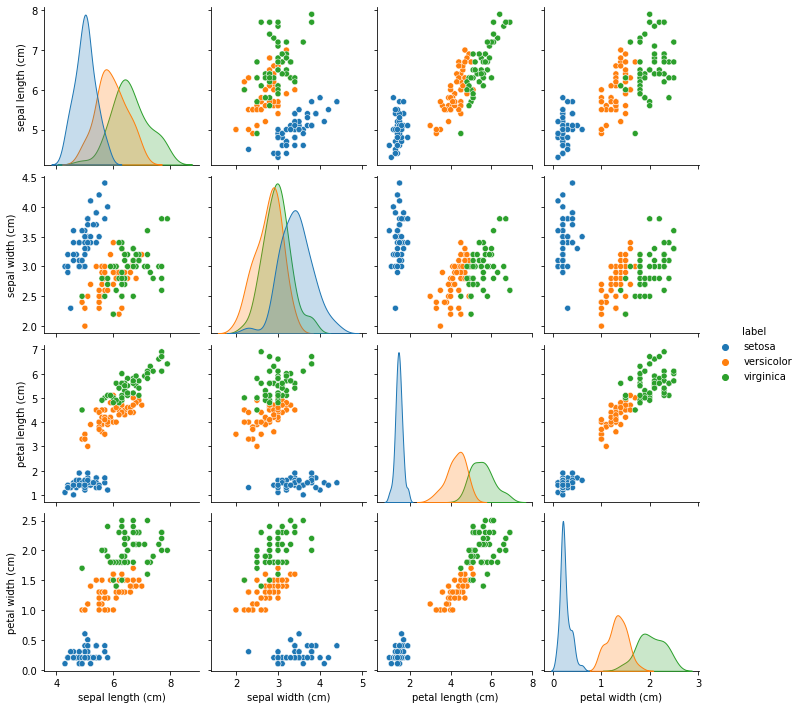

In [ ]:
# Task1 use label as hue and kind as scatter to plot df dataframe 
sns.pairplot(df,hue='label',kind='scatter')

*EXERCISE NO. 1 : TASK 5*

> **SCORE : 5**



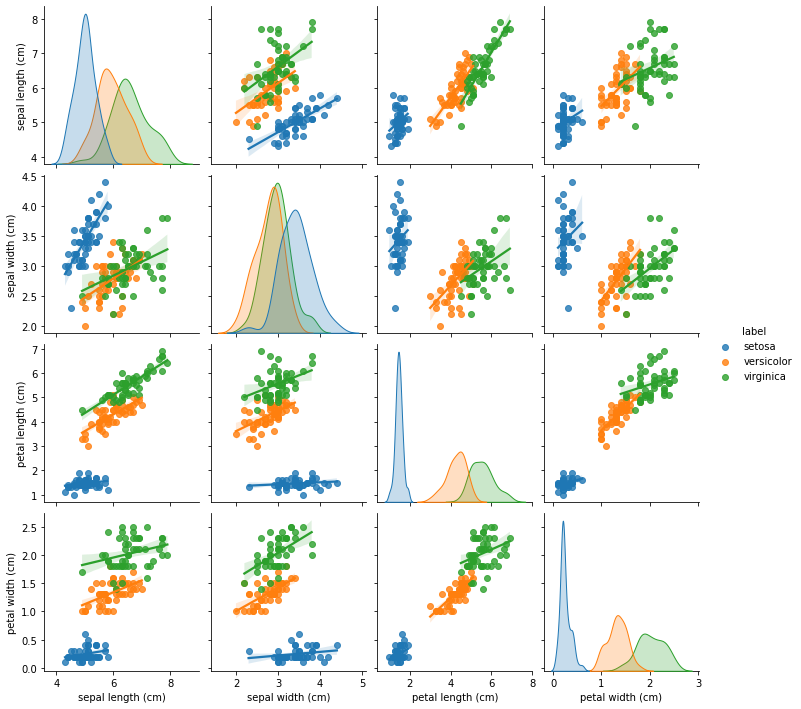

In [ ]:
# Task2 use label as hue and kind as regression(reg) to plot df dataframe 
sns.pairplot(df, hue='label', kind='reg')

*EXERCISE NO. 1 : TASK 6*

> **SCORE : 5**



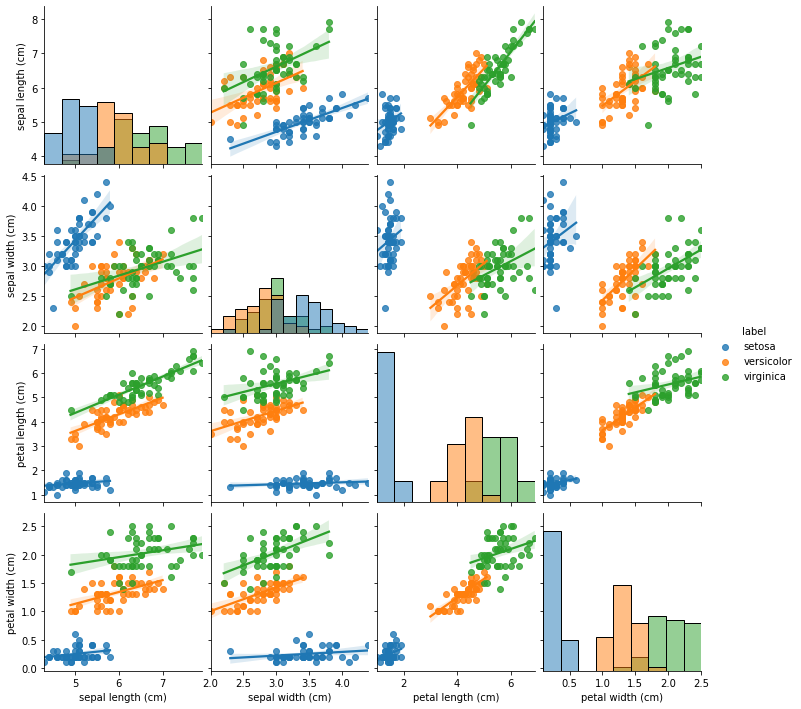

In [ ]:
# Task3 use label as hue and kind as regression(reg) and diag_kind as hist to plot df dataframe 
sns.pairplot(df, hue='label', kind='reg', diag_kind='hist')

*EXERCISE NO. 1 : TASK 7*

> **SCORE : 10**



In [ ]:
# Now you might have understood something about dataset
# What are your 3 major observation?

'''
Your answer goes here:
1) There is no overlap of the setosa and versicolor and virginica
2) Verginica and versicolor overlap with several properties 
3) The sepal is much greater in size based on the data provided 

'''


'\nYour answer goes here:\n1) There is no overlap of the setosa and versicolor and virginica\n2) Verginica and versicolor overlap with several properties \n3) The sepal is much greater in size based on the data provided \n\n'

*EXERCISE NO. 1 : TASK 8*

> **SCORE : 5**



In [ ]:
# Now use sklearn data train test split functionality to split data into train test with 20% split
# iris.data corresponds to x 
# iris.target corresponds to y 
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(iris.data, iris.target, test_size = 0.2)

In [ ]:
# If you have gone through some of the details of logistic regression
# You might have come accross sigmoid function

![sigmoid](https://www.researchgate.net/profile/Knut_Kvaal/publication/239269767/figure/fig2/AS:643520205430784@1530438581076/An-illustration-of-the-signal-processing-in-a-sigmoid-function.png)

**Example of sigmoid function**


49.898476 -50.0
1.0 1.9287528e-22


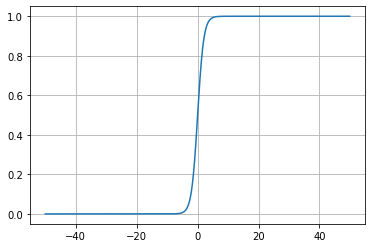

In [ ]:
# Now using numpy implement a sigmoid function that squish given input to between 0 and 1
# Write a sigmoid function that takes value x and compute above sigmoid function
import numpy as np

def sigmoid(x):
  return 1./(1.+np.e**(-x))


# Now here use np.arange function to create array values from -50 to 50 , use step size as 0.1 and pass this to sigmoid and store in sigout variable
x = np.arange(-50,50,0.1, dtype=np.float32)
sigout = sigmoid(x)

# print max and min of x 
print(max(x), min(x))

# print max and min of sigout

print(max(sigout), min(sigout))

# Now use matplotlib to plot x in x and sigout in y
plt.plot(x,sigout)
plt.grid()


# You might have understood something from above experiment
# Write two important things you have noticed about sigmoid function
# Your answer goes here

# 1) steps need to be taken in small amounts to see curve change 
# 2) Attempts to account for probability within a dataset 


In [ ]:
# Now lets talk about loss function in logistic regression

## How Logistic Regression is trained

The goal of most machine learning algorithms is to minimize some prediction error. That error can be measured in verious ways. The function that measures the amount of error is also known as the **Loss Function**. For example, in Regression we can use the Mean Squared Error (MSE) as the loss funtion. A commond loss function used for classification tasks is the Cross-entropy Loss.

In the following exercises, we will use that type of loss in our Logistic Regression models. More information about loss functions can be found in the following link:
https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23 

**Example of logistic regression crossentropy-based loss function**



![alt text](https://userweb.cs.txstate.edu/~k_b459/logi.png)

In [ ]:
# Implement above logistic loss function as logistic_loss (solution already provided)
# The aboce loss is also called as binary cross entropy loss
# https://en.wikipedia.org/wiki/Cross_entropy
def logistic_loss(y, y_hat):
  return -np.mean(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))

**Example of parameter dimensions**




In [ ]:
# Now pay attention to following important instructions
# Lets take a simple example where x has size (100, 1) and y has size (100,1) here 100 is just the number of instances
# Important thing is number '1' which is actual dimension of x and y (coincident-here our x and y has same dimension)
# So now we can formulate this problem as linear regression problem y = w*x + b
# Now assume everything as matrix multiplication and additon

# Now pay attention to following few examples
import numpy as np
x = np.random.randn(100,1) #my data set has 100 instances and 1 feature
y = np.random.randint(0,2,(100,1)) # my data set target with dimension 1
w = np.random.randn(1,1)
b = np.random.randn(1,1)

y_hat = x@w + b #this is my linear model
print(y_hat.shape) # this will be (100,1)
print(y_hat.shape == y.shape) # this should be true

# Lets take another example
x = np.random.randn(100,4) #my data set has 100 instances and 4 feature
y = np.random.randint(0,2,(100,1)) # my data set target w-np.mean(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))ith dimension 1
w = np.random.randn(4,1)
b = np.random.randn(1,1)

y_hat = x@w + b #this is my linear model
print(y_hat.shape) # this will be (100,1)
print(y_hat.shape == y.shape) # this should be true


# Lets take another example
x = np.random.randn(100,1) #my data set has 100 instances and 1 feature
y = np.random.randint(0,2,(100,3)) # my data set target with dimension 3
w = np.random.randn(1,3)
b = np.random.randn(1,3)

y_hat = x@w + b #this is my linear model
print(y_hat.shape) # this will be (100,3)
print(y_hat.shape == y.shape) # this should be true

# So now you can relate this to our problem
# our data has 4 features and label has 3 dimension 
# so it is now what random w and b should be created
# your code goes here
w = np.random.randn(4,3)
b = np.random.randn(1,3)

# But if you see iris.target data shape it is (150,?) 
# If you see unique values in iris.target they are 0,1,2
print(iris.target.shape)
print(np.unique(iris.target))

# Now considering this you have to change our real x and y 
# There is nothing to change for x
X = iris.data
print(X.shape)
Y = np.eye(np.max(iris.target)+1)[iris.target]
print(Y.shape)

# Now use again train test split to create new xtrain,xtest, ytrain and ytest
xtrain, xtest, ytrain, ytest = train_test_split(X, Y)

(100, 1)
True
(100, 1)
True
(100, 3)
True
(150,)
[0 1 2]
(150, 4)
(150, 3)


*EXERCISE NO. 1 : TASK 9*

> **SCORE : 20**



In [ ]:
# Now let us create our model 
# use lambda function to create a model
# this must first compute dot product of x and w then add b and pass this result to sigmoid and return from model
from tqdm import tqdm

class Model:
  def __init__(self, w, b, epoch=50, learning_rate = 1e-3):
    self.w = w
    self.b = b
    self.epoch = epoch
    self.learning_rate = 1e-3
  
  def sigmoid(self, x):
    # implement sigmoid function
    return 1./(1.+np.e**(-x))

  def logistic_loss(self,y, y_hat):
    # implement logistic loss
    return -np.mean(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))

  def predict(self, x):
    # return argmax of output from probability from dim 1
    return np.argmax(self.probability(x),1)
  
  def probability(self,x):
    # return sigmoid (x*w + b)
    return self.sigmoid(x@ self.w+self.b)

  def fit(self, x, y, xtest, ytest, atevery=50):

    record = {'train':{'loss':[],'accuracy':[]},'test':{'loss':[],'accuracy':[]}}
    stream = tqdm(range(self.epoch))
    for epoch in stream:
      # z is probability of input x 
      z = self.probability(x) 
      
      # loss is the logistic loss of y and z
      train_loss = self.logistic_loss(y,z)

      # dz is the error which is the difference of probability with real output (difference between z and y) 
      dz = z - y

      # m is length of data which is actually length of error(dz)
      m = len(dz)

      # derivative of dw is the matrix product of x transpose and error(dz) and then divided by m
      #Please refer these two links for better understanding matrix product and matrix transpose
      # https://numpy.org/doc/stable/reference/generated/numpy.matmul.html
      # https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T      
      dw = np.matmul(x.T, dz) / m

      # db is the sum of dz 0 axis, pass keepdims=True 
      db = np.sum(dz, axis= 0, keepdims=True)
      
      # Update w which is the difference between w and product of dw and learning rate
      self.w = self.w - (dw * self.learning_rate) 
      
      # Update b which is the difference between b and product of db and learning rate 
      self.b = self.b - (db * self.learning_rate)

      # Print every 50 steps
      if epoch%atevery==0:
        record['train']['loss'].append(train_loss)
        record['train']['accuracy'].append(self.score(x,y))
        loss = self.logistic_loss(ytest, self.probability(xtest))
        accuracy = self.score(xtest,ytest)
        record['test']['loss'].append(loss)
        record['test']['accuracy'].append(accuracy)
        stream.set_postfix_str(f'loss : {loss:.2f}, accuracy : {accuracy:.2f}')
    return record

  def score(self, xtest, ytest):
    matches = self.predict(xtest) == np.argmax(ytest,1)
    return 100*(matches.sum()/len(matches))

100%|██████████| 50/50 [00:00<00:00, 637.36it/s, loss : 1.43, accuracy : 26.32]


[]

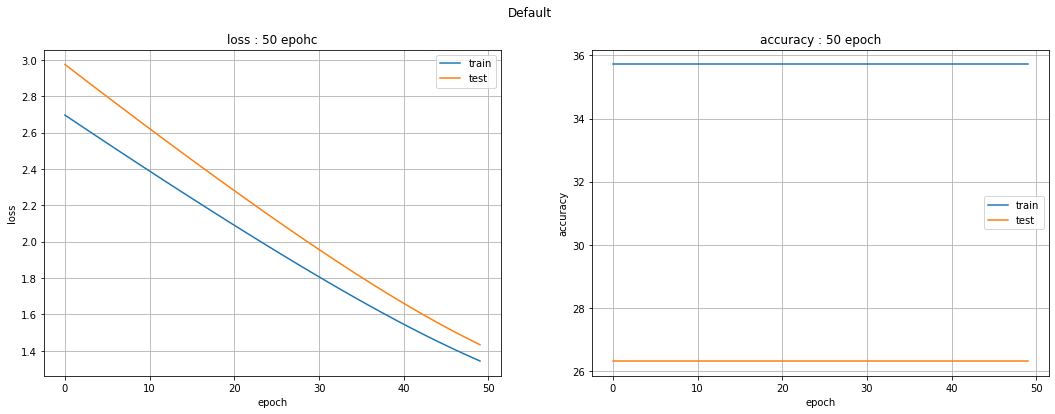

In [ ]:
# We will define two important hyper-parameter here result
# epoch and learning rate
# https://machinelearningmastery.com/understand-the-dynamics-of-lxtrain@wearning-rate-on-deep-learning-neural-networks/

# Now we will instantiate our model with w,b we used above and use default epoch size and learning rate
model = Model(w,b)
# fit the model print results at every epoch 
record = model.fit(xtrain, ytrain, xtest, ytest,1)

from pylab import rcParams
rcParams['figure.figsize'] = 18, 6

# now plot losses the data in result with legend for train and test
plt.subplot(1,2,1)
# Requirements for the plot
"""
1.Must have legend
2.Must have xlabel and ylabel
3.Must have grid enabled
4.Must have sub-title
"""

plt.plot(record['train']['loss'], label = 'train')
plt.plot(record['test']['loss'], label = 'test')
plt.title('loss : 50 epohc')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.plot()

# now plot accuracy the data in result with legend for train and test
ax = plt.subplot(1,2,2)
# Requirements for the plot
"""
1.Must have legend
2.Must have xlabel and ylabel
3.Must have grid enabled
4.Must have sub-title
"""

plt.plot(record['train']['accuracy'], label = 'train')
plt.plot(record['test']['accuracy'], label = 'test')
plt.title('accuracy : 50 epoch')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

# This will add main title
plt.suptitle(f'Default')
plt.plot()


**Example of plotwithconfig**



In [ ]:
# It is useless to write long code again and again so lets write a function that takes following arguments
# So we will write a funciton  that takes above configuration and return a plot
def plotwithconfig(config):
  model = Model(**config)
  record = model.fit(xtrain, ytrain, xtest, ytest)
  print(record.keys())
  for i,l in enumerate(['loss','accuracy']):
    plt.subplot(1,2,i+1)
    plt.plot(record['train'][l], label = 'train')
    plt.plot(record['test'][l], label = 'test')
    plt.title(f"{l}")
    plt.xlabel('epoch')
    plt.ylabel(f'{l}')
    plt.legend()
    plt.grid()

  plt.suptitle(f"epoch : {config.get('epoch')}, learning_rate : {config.get('learning_rate')}")

*EXERCISE NO. 1 : TASK 10*

> **SCORE : 2.5x6=15**



In [ ]:
# Now repeat similar plot for following configurations
config_1 = {'w':np.random.randn(4,3),'b':np.random.randn(1,3),'epoch':500,  'learning_rate' : 1e-3,}
config_2 = {'w':np.random.randn(4,3),'b':np.random.randn(1,3),'epoch':5000, 'learning_rate' : 1}
config_3 = {'w':np.random.randn(4,3),'b':np.random.randn(1,3),'epoch':5000, 'learning_rate' : 1e-1}
config_4 = {'w':np.random.randn(4,3),'b':np.random.randn(1,3),'epoch':5000, 'learning_rate' : 1e-7}
config_5 = {'w':np.random.randn(4,3),'b':np.random.randn(1,3),'epoch':5000, 'learning_rate' : 3}
config_6 = {'w':np.random.randn(4,3),'b':np.random.randn(1,3),'epoch':5000, 'learning_rate' : 10}

In [ ]:
# Plot config1
config_1 = {'w':np.random.randn(4,3),'b':np.random.randn(1,3),'epoch':500,  'learning_rate' : 1e-3,}


In [ ]:
# Plot config2
config_2 = {'w':np.random.randn(4,3),'b':np.random.randn(1,3),'epoch':5000, 'learning_rate' : 1}


In [ ]:
# Plot config3
config_3 = {'w':np.random.randn(4,3),'b':np.random.randn(1,3),'epoch':5000, 'learning_rate' : 1e-1}


In [ ]:
# Plot config4
config_4 = {'w':np.random.randn(4,3),'b':np.random.randn(1,3),'epoch':5000, 'learning_rate' : 1e-7}


In [ ]:
# Plot config5
config_5 = {'w':np.random.randn(4,3),'b':np.random.randn(1,3),'epoch':5000, 'learning_rate' : 3}


In [ ]:
# Plot config1
config_6 = {'w':np.random.randn(4,3),'b':np.random.randn(1,3),'epoch':5000, 'learning_rate' : 10}


*EXERCISE NO. 1 : TASK 11*

> **SCORE : 10**



In [ ]:
# Now compare all these configuration
# What are the two important things you observe from the experiment??

'''
Your answer goes here:
1) Each configuration seeds a different random number to compare to
2) With each configuratuon the speed of the learning rate is also changed along with the epoch size 

'''


'\nYour answer goes here:\n1) Each configuration seeds a different random number to compare to\n2) With each configuratuon the speed of the learning rate is also changed along with the epoch size \n\n'

*EXERCISE NO. 1 : TASK 12*

> **SCORE : 10**



100%|██████████| 50000/50000 [00:07<00:00, 6719.06it/s, loss : 0.23, accuracy : 89.47]


dict_keys(['train', 'test'])


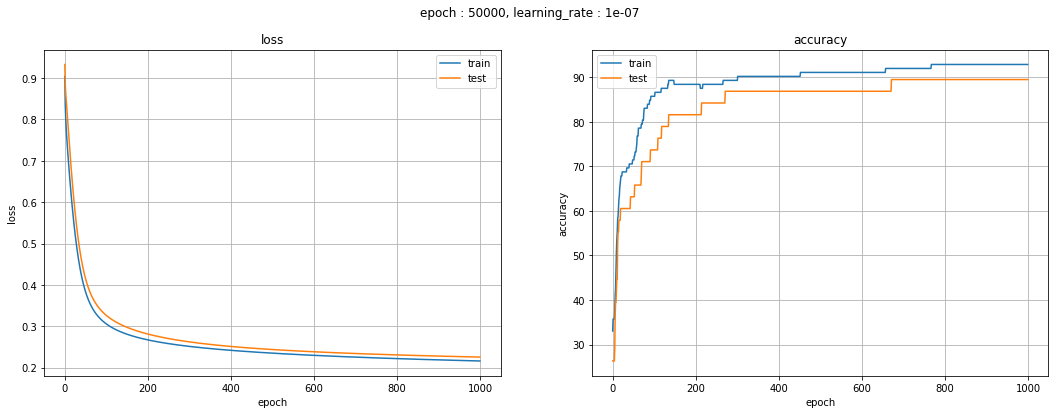

In [ ]:
# Now recall the data normalization techniques
# Normalize only x data and then do same experiment with config_4
# you have to compute std and mean along with axis 0 now
# write a function that normalize given xdata
# Note you will need add 1e-10 to std in case the over small std causes 0 result. 
def normalize(xdata):
  std = np.std(xdata, axis=0) + 1e-10
  mean = np.mean(xdata, axis=0)
  return (xdata-mean)/std

# Now you will use above function to create xtrain and xtest these are new version of xtrain and xtest
# No need to normalize ytrain and ytest
xtrain = normalize(xtrain)
xtest = normalize(xtest)

# Now use config_4 and change epoch number to 50000 
# config_4 = {'w':np.random.randn(4,3),'b':np.random.randn(1,3),'epoch':5000, 'learning_rate' : 1e-7}
config_4.update({'epoch':50000})
plotwithconfig(config_4)

*EXERCISE NO. 1 : TASK 13*

> **SCORE : 5**



In [ ]:
# What difference did you get with normalization?? Was it Useful??

'''
Your answer goes here:

The biggest normalization noticed was a increased accuracy of the model bringing the overall model up 60% in overall accuracy 


'''


'\nYour answer goes here:\n\nThe biggest normalization noticed was a increased accuracy of the model bringing the overall model up 60% in overall accuracy \n\n\n'

*EXERCISE NO. 1 : TASK 14*

> **SCORE : 5**



In [ ]:
# Now from above experiment, chose appropriate hyperparameter and instantiate a model 
# Fit your model on new xtrain, xtest i.e, normalized
best_epoch = 50000
best_learning_rate = 1e-7
model = Model(w,b,best_epoch, best_learning_rate)
result = model.fit(xtrain,ytrain, xtest, ytest)

100%|██████████| 50000/50000 [00:07<00:00, 6783.48it/s, loss : 0.22, accuracy : 89.47]


In [ ]:
# Now predict xtest and use confusion matrix example given in references
# Find confusion matrix for multi class problem 
# Plot confusion matrix
# Note output of .predict will be simply label, but ytest is a one hot encoding
# You can use np.argmax to convert ytest from onehot to simple list of 0,1,2 where each represent different 
# class ['setosa','versicolor','virginica'] index wise
ytest_pred = model.predict(xtest)
ytest_true = np.argmax(ytest,1)
print(ytest_pred)
print(ytest_true)

[0 1 1 1 2 1 0 1 2 1 1 0 1 0 0 2 1 1 2 0 0 2 0 2 0 0 2 2 2 2 0 2 2 0 0 2 1
 2]
[0 1 1 1 2 1 0 1 2 1 1 0 1 0 0 1 1 1 2 0 0 1 0 2 0 0 2 1 1 2 0 2 2 0 0 2 1
 2]


In [ ]:
# Import sklearn confusion metrix
# Please see documentation of confusion_matrix properly and pass right labels name
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
# Please Map your output to actual label name
labels = ['setosa','versicolor','virginica']
ytest_pred = list(map(lambda x:labels[x], ytest_pred))
ytest_true = list(map(lambda x:labels[x], ytest_true))
cmatrix = confusion_matrix(ytest_true, ytest_pred, labels=labels)

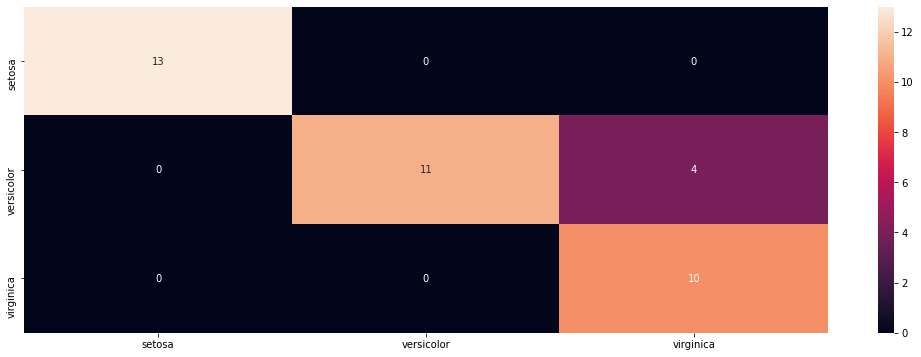

In [ ]:
# Import seaborn and use heatmap
# Use annot and cbar as True, and xticklabels and yticklabels should be labels we talked before
import seaborn as sns
sns.heatmap(cmatrix, annot=True, cbar=True, xticklabels=labels, yticklabels=labels)

### 2. Understand LDA 
---



---



In [ ]:
# Please follow following posts
# https://towardsdatascience.com/linear-discrim[inant-analysis-in-python-76b8b17817c2
# This post has step wise step method to implement LDA from scratch
# You will be doing same task on LDA but this time you will be using iris data set

# Study the code and understand LDA
# Task 1 : Compute class_feature_means for all the variable in our dataset

# Task 2 : Compute eigen_values and eigen_vectors

# Task 3 : Finally Visualize your result



In [ ]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)
print(X.head)
print(y)
df = X.join(pd.Series(y, name='class'))

# 1. Compute the within class and between class scatter matrices
class_feature_means = pd.DataFrame(columns=iris.target_names)
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
print(class_feature_means)

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>
['setosa'

In [ ]:
# 2. Compute eigen values and eigen vector
from sklearn.preprocessing import LabelEncoder

within_class_scatter_matrix = np.zeros((4,4))
for c, rows in df.groupby('class'):
  rows = rows.drop(['class'], axis=1)
  s = np.zeros((4,4))
  for index, row in rows.iterrows():
      x, mc = row.values.reshape(4,1), class_feature_means[c].values.reshape(4,1)
      s += (x - mc).dot((x - mc).T)
      within_class_scatter_matrix += s


feature_means = df.mean()
between_class_scatter_matrix = np.zeros((4,4))
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index)
    mc, m = class_feature_means[c].values.reshape(4,1), feature_means.values.reshape(4,1)
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

print(f'eigen_values = {eigen_values}')
print(f'eigen_vectors = {eigen_vectors}')

pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])


eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

w_matrix = np.hstack((pairs[0][1].reshape(4,1), pairs[1][1].reshape(4,1))).real
print('w_matrix',w_matrix, w_matrix.shape)
X_lda = np.array(X.dot(w_matrix))


le = LabelEncoder()
y = le.fit_transform(df['class'])
print(y)

eigen_values = [ 1.29402942e+00  1.06106806e-02  5.31655396e-17 -3.16182658e-16]
eigen_vectors = [[ 0.17658808  0.0040293   0.88471663 -0.46915269]
 [ 0.40002999 -0.56833189 -0.28010405  0.43977052]
 [-0.48738426  0.25639946 -0.25512555  0.48737374]
 [-0.75581032 -0.78181963 -0.27153115 -0.59073215]]
1.294029421317885
0.01061068056000973
3.161826583022941e-16
5.316553961225581e-17
Explained Variance
Eigenvector 0: 0.9918669673385507
Eigenvector 1: 0.00813303266144951
Eigenvector 2: 2.423523988318172e-16
Eigenvector 3: 4.0751115603245305e-17
w_matrix [[ 0.17658808  0.0040293 ]
 [ 0.40002999 -0.56833189]
 [-0.48738426  0.25639946]
 [-0.75581032 -0.78181963]] (4, 2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


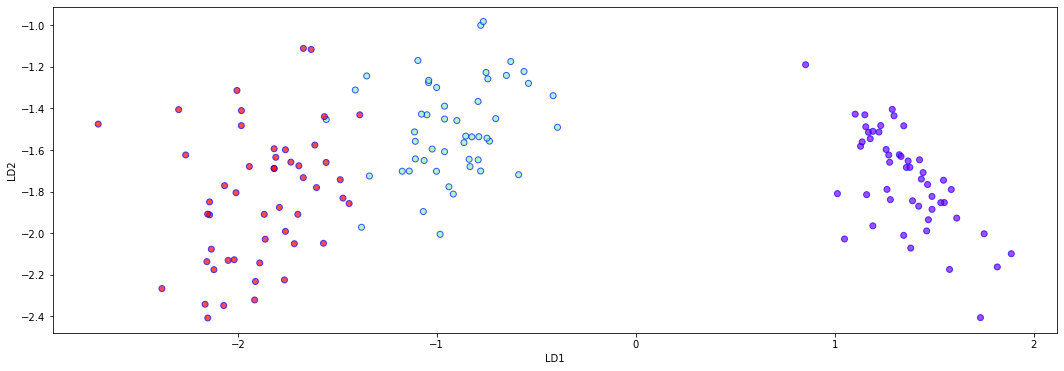

In [ ]:
# Visualize the result
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

### 3. Understanding and implementing LDA and QDA using scikitlearn
---



---



***EXERCISE NO. 3***

1.   List item
2.   List item



> **SCORE : 5x2 + 10x2 + 5 + 10 = 45**



In [ ]:
# Visit given references
# In scikit learn you can see multiple examples of LDA and QDA 
# Implement these examples in two versions of our data and compare the results


# Version 1, non-normalized data
# Version 2, normalized data


# You have to perform following task

# SCORE : 5X2
# Task 1: Create non-normalized dataset from iris_data [you can use code from above], xtrain,xtest,ytrain,ytest
# Task 2: Create normalized dataset from iris_data [you can use code from above], nxtrain,nxtest,ytrain,ytest

# SCORE : 10X2
# Task 3: Use LDA function from sklearn, initialize a model and fit LDA
# Task 4: Use QDA function from sklearn, initialize a model and fit QDA

# SCORE : 5 + 10
# Task 5: Get Accuracy on both train and test set and compare this with normalized and non-normalized version
# Task 6: Discuss an important thing you observed in this experiment?? What is the fundamental difference between QDA and LDA?


In [137]:
# Task 1 
from sklearn.model_selection import train_test_split 
# Non-normalized data 
xtrain, xtest, ytrain, ytest = train_test_split(X, y)

# Task 2
# Normalized data set 
nxtrain, nxtest = normalize(xtrain), normalize(nxtest)

In [138]:
# Task 3
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

lda = LinearDiscriminantAnalysis()
n_norm_lda = lda.fit_transform(xtrain,ytrain)

print("Explained Variance Ratio: ", lda.explained_variance_ratio_)

print ("\nTrain Accuracy: ", lda.score(xtrain, ytrain))
print ("Test Accuracy: ", lda.score(xtest, ytest))

n_lda = LinearDiscriminantAnalysis()
normal = n_lda.fit_transform(nxtrain,ytrain)

print ("Normalized Train Accuracy: ", n_lda.score(nxtrain, ytrain))
print ("Normalized Test Accuracy: ", n_lda.score(nxtest, ytest))


# Task 4
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(xtrain,ytrain)

print ("\nQuadtratic Train Accuracy: ", qda.score(xtrain, ytrain))
print ("Quadratic Test Accuracy: ", qda.score(xtest, ytest))

norm_qda = QuadraticDiscriminantAnalysis()
norm_model = norm_qda.fit(nxtrain,ytrain)

print ("Quadratic Normalized Train Accuracy: ", norm_qda.score(nxtrain, ytrain))
print ("Quadratic Normalized Test Accuracy: ", norm_qda.score(nxtest, ytest))


# Task 6 
# The differences in LDA and QDA are marginal with only the train accuracy increasing 


Explained Variance Ratio:  [0.99124972 0.00875028]

Train Accuracy:  0.9910714285714286
Test Accuracy:  0.9736842105263158
Normalized Train Accuracy:  0.9910714285714286
Normalized Test Accuracy:  0.34210526315789475

Quadtratic Train Accuracy:  0.9910714285714286
Quadratic Test Accuracy:  0.9736842105263158
Quadratic Normalized Train Accuracy:  0.9910714285714286
Quadratic Normalized Test Accuracy:  0.34210526315789475


In [ ]:
"""
NOTICE:
YOU CAN HAVE AS MANY CELLS AS YOU WANT FOR ABOVE QUESTION
"""
print()

*EXERCISE NO. 3 : TASK 1*

> **SCORE : 5**



In [ ]:
# non normalize data 
#still using iris.data 
xtrain, xtest, ytrain, ytest = train_test_split(X, y)

*EXERCISE NO. 3 : TASK 2*

> **SCORE : 5**



In [ ]:
# normalize data
nxtrain, nxtest = normalize(xtrain), normalize(nxtest)

*EXERCISE NO. 3 : TASK 3*

> **SCORE : 10**



non norm explained variance ratio : [0.99320865 0.00679135]
norm explained variance ratio : [0.99320865 0.00679135]


Text(0.5, 0.98, 'lda plots')

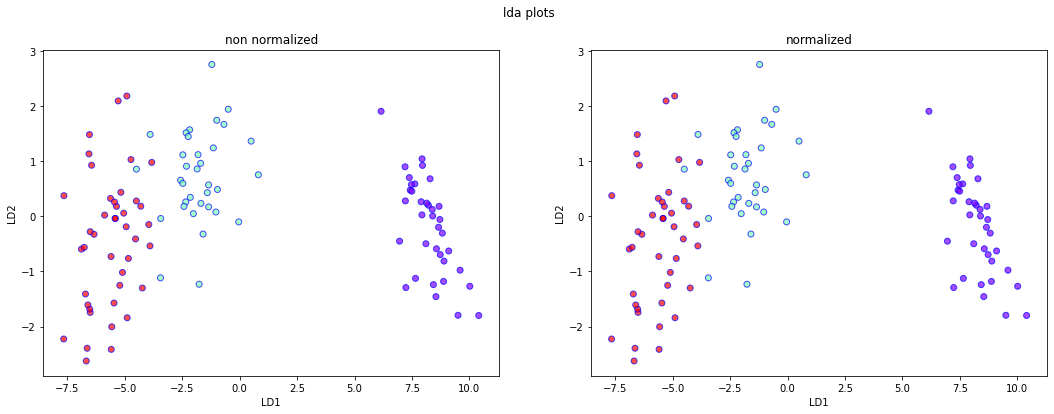

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Use LinearDiscriminantAnalysis to fit xtrain, ytrain, nxtrain, nytrain 
non_norm_lda = LinearDiscriminantAnalysis()
non_norm_x_lda = non_norm_lda.fit_transform(xtrain,ytrain)

norm_lda = LinearDiscriminantAnalysis()
norm_x_lda = norm_lda.fit_transform(nxtrain, ytrain)

print(f'non norm explained variance ratio : {non_norm_lda.explained_variance_ratio_}')
print(f'norm explained variance ratio : {norm_lda.explained_variance_ratio_}')

plt.subplot(1,2,1)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('non normalized')
plt.scatter(
    non_norm_x_lda[:,0],
    non_norm_x_lda[:,1],
    c=ytrain,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

plt.subplot(1,2,2)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('normalized')
plt.scatter(
    norm_x_lda[:,0],
    norm_x_lda[:,1],
    c=ytrain,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.suptitle('lda plots')

*EXERCISE NO. 3 : TASK 4*

> **SCORE : 10**



In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Use QuadraticDiscriminantAnalysis to fit xtrain, ytrain, nxtrain, nytrain
non_norm_qda = QuadraticDiscriminantAnalysis()
non_norm_qda.fit(xtest,ytest)

norm_qda = QuadraticDiscriminantAnalysis()
norm_qda.fit(nxtrain,ytrain)

y_qda_non_norm = non_norm_qda.predict(xtrain)
y_qda_norm = non_norm_qda.predict(nxtrain)

In [ ]:
print(f' normalized score qda: {norm_qda.score(nxtest,ytest)}')
print(f' non-normalized score qda: {non_norm_qda.score(nxtest,ytest)}')
print(f' normalized score lda: {norm_lda.score(nxtest,ytest)}')
print(f' non-normalized score lda: {non_norm_lda.score(nxtest,ytest)}')

 normalized score qda: 0.39473684210526316
 non-normalized score qda: 0.42105263157894735
 normalized score lda: 0.39473684210526316
 non-normalized score lda: 0.47368421052631576


*EXERCISE NO. 3 : TASK 6*

> **SCORE : 5*4 = 20**



In [ ]:

# Answer the following questions:
'''
1) What is LDA? 
2) What is QDA? 
3) What is the fundamental difference between QDA and LDA? 
4) Discuss an important thing you observed in this experiment. 
'''



'''
Your answer goes here: 
1) Uses a linear combination of features to catagorize two or more events/objects
2) Relys on traits of objects to classify relation and make prediction
3) Both may end up with similar results based on the dataset 
4) normalizing the data in the sets hurt the overall accuracy of the model with the test data

'''